In [1]:
# food_delivery_time_prediction/
# │
# ├── data/
# │   └── dataset.csv   # Your dataset
# │
# ├── eda/
# │   └── eda_analysis.ipynb   # Exploratory Data Analysis (Notebook)
# │
# ├── preprocessing/
# │   └── preprocess.py    # Data preprocessing functions
# │
# ├── models/
# │   └── model.py         # Model training and saving
# │
# ├── deployment/
# │   └── app.py           # Deployment code (Flask or FastAPI app)
# │
# ├── saved_models/
# │   └── model.pkl        # Trained model saved
# │
# ├── requirements.txt     # Python libraries needed
# └── README.md            # Project overview


## About data:
This dataset is designed for predicting food delivery times based on various influencing factors such as distance, weather, traffic conditions, and time of day. It offers a practical and engaging challenge for machine learning practitioners, especially those interested in logistics and operations research.

Key Features:

* Order_ID: Unique identifier for each order.

* Distance_km: The delivery distance in kilometers.

* Weather: Weather conditions during the delivery, including Clear, Rainy, Snowy, Foggy, and Windy.

* Traffic_Level: Traffic conditions categorized as Low, Medium, or High.

* Time_of_Day: The time when the delivery took place, categorized as Morning, Afternoon, Evening, or Night.

* Vehicle_Type: Type of vehicle used for delivery, including Bike, Scooter, and Car.

* Preparation_Time_min: The time required to prepare the order, measured in minutes.

* Courier_Experience_yrs: Experience of the courier in years.

* Delivery_Time_min: The total delivery time in minutes (target variable).

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import pickle
import os

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [3]:
# mount the cloud
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Load the data

In [4]:
data=pd.read_csv("/content/drive/MyDrive/Machine_Learning/Practise_Projects/Linear_regression/Datasets/Food_Delivery_Times.csv")

In [5]:
#Top few Records
data.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [6]:
#Last few Records
data.tail()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55
999,103,6.63,Foggy,Low,Night,Scooter,24,3.0,58


In [7]:
#ramdom sample records
data.sample(3)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
207,919,15.39,Clear,Medium,Evening,Scooter,24,5.0,89
851,780,13.00,Foggy,Low,Evening,Bike,25,7.0,77
163,651,2.19,Clear,Low,Evening,Bike,26,3.0,32


In [8]:
#General Information on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [9]:
#shape
data.shape

(1000, 9)

In [10]:
#Basic Stats on the dataset
data.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [11]:
#Check for the null values in the dataset
data.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [12]:
#Check for the Duplicates in the dataset
data.duplicated().sum()

np.int64(0)

In [13]:
# Making the Numerical and Categorical variables
num_cols =data.select_dtypes(include=np.number).columns
cat_cols = data.select_dtypes(exclude=np.number).columns

In [14]:
num_cols

Index(['Order_ID', 'Distance_km', 'Preparation_Time_min',
       'Courier_Experience_yrs', 'Delivery_Time_min'],
      dtype='object')

In [15]:
cat_cols

Index(['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'], dtype='object')

In [16]:
#Finding the different categories in the cat_cols
for col in cat_cols:
  print(col,data[col].unique())

Weather ['Windy' 'Clear' 'Foggy' 'Rainy' 'Snowy' nan]
Traffic_Level ['Low' 'Medium' 'High' nan]
Time_of_Day ['Afternoon' 'Evening' 'Night' 'Morning' nan]
Vehicle_Type ['Scooter' 'Bike' 'Car']


### Observation:

* Food Delivery time dataset contains the 9 columns and 1000 records of delivery details
*  Few null records in the dataset
      * Weather	30
      * Traffic_Level	30
      * Time_of_Day	30
      * Courier_Experience_yrs	30
* There are No Duplicated Records

* Numerical columns in the dataset : Order_ID , Distance_km, Preparation_Time_min,
Courier_Experience_yrs, Delivery_Time_min

* Categorical columns: Weather, Traffic_Level, Time_of_Day, Vehicle_Type

* Unique values in the  Categorical columns
* Weather--> ['Windy' 'Clear' 'Foggy' 'Rainy' 'Snowy' nan]
* Traffic_Level --> ['Low' 'Medium' 'High' nan]
* Time_of_Day -->['Afternoon' 'Evening' 'Night' 'Morning' nan]
* Vehicle_Type -->['Scooter' 'Bike' 'Car']



#### Cleaning data

In [17]:
data.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

In [18]:
#filling the Weather columns with the mode value (categorical variable)
data["Weather"].fillna(data["Weather"].mode()[0],inplace=True)

#filling the Traffic_Level with the model value (categorical variable)
data["Traffic_Level"].fillna(data["Traffic_Level"].mode()[0],inplace=True)

# filling the Time_of_Day with the model value (categorical variable)
data["Time_of_Day"].fillna(data["Time_of_Day"].mode()[0],inplace=True)

# filling the Courier_Experience_yrs with  the mean values (continous variable)
data["Courier_Experience_yrs"].fillna(data["Courier_Experience_yrs"].mean(),inplace=True)

In [19]:
#Check for the Null values
data.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0


### Observation :
* ALL Null values are cleared

In [20]:
#Let's Drop the unnecessary records of the data
data.drop("Order_ID",axis=1,inplace=True)

### Visualization on the dataset


#### Visulaization on the  Numerical columns

In [21]:
num_cols= data.select_dtypes(include=np.number).columns

<Figure size 1500x1500 with 0 Axes>

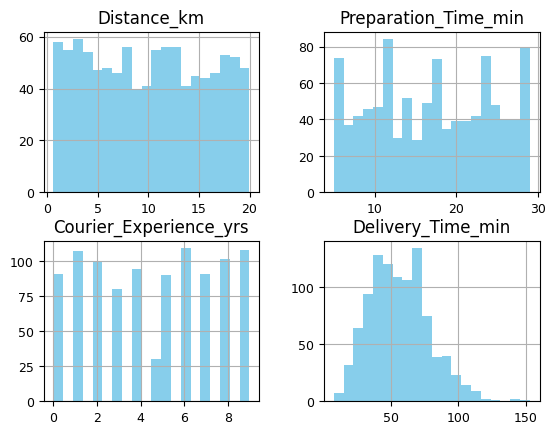

In [22]:
plt.figure(figsize=(15,15))
data[num_cols].hist(bins=20,xlabelsize=9,ylabelsize=9,color=["skyblue"])
plt.show()

### visulaization for the categorical variables


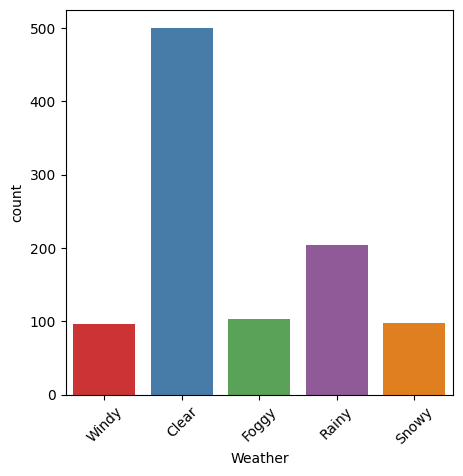

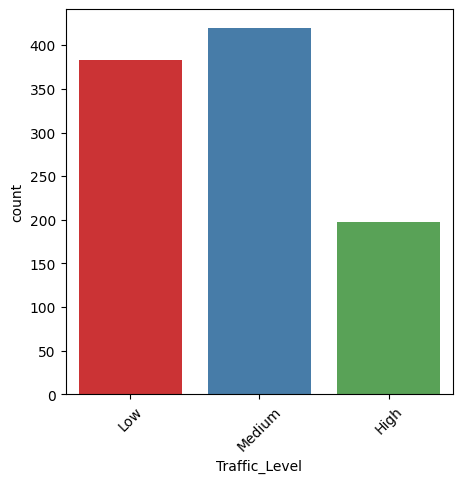

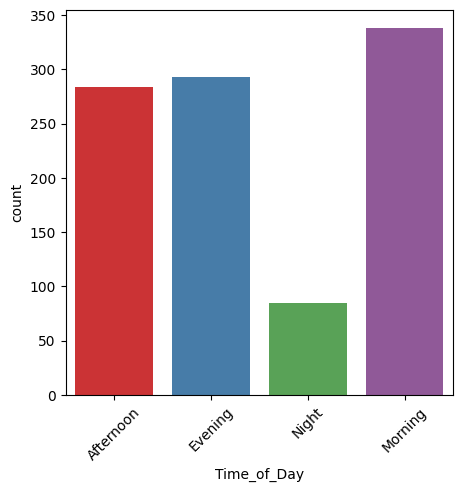

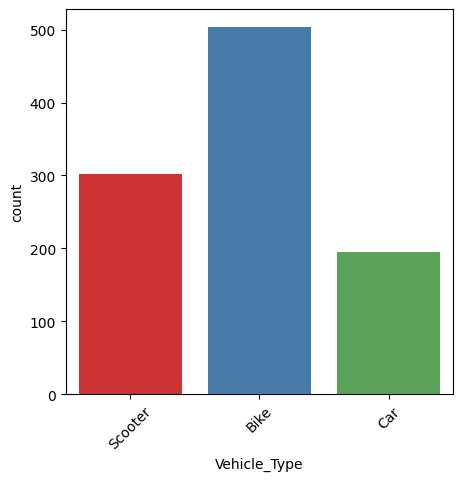

In [23]:
for col in cat_cols:
  plt.figure(figsize=(5,5))
  sns.countplot(data=data,x=col,palette="Set1")
  plt.xticks(rotation=45)
  plt.xlabel(col)
  plt.show()

Pair Plot

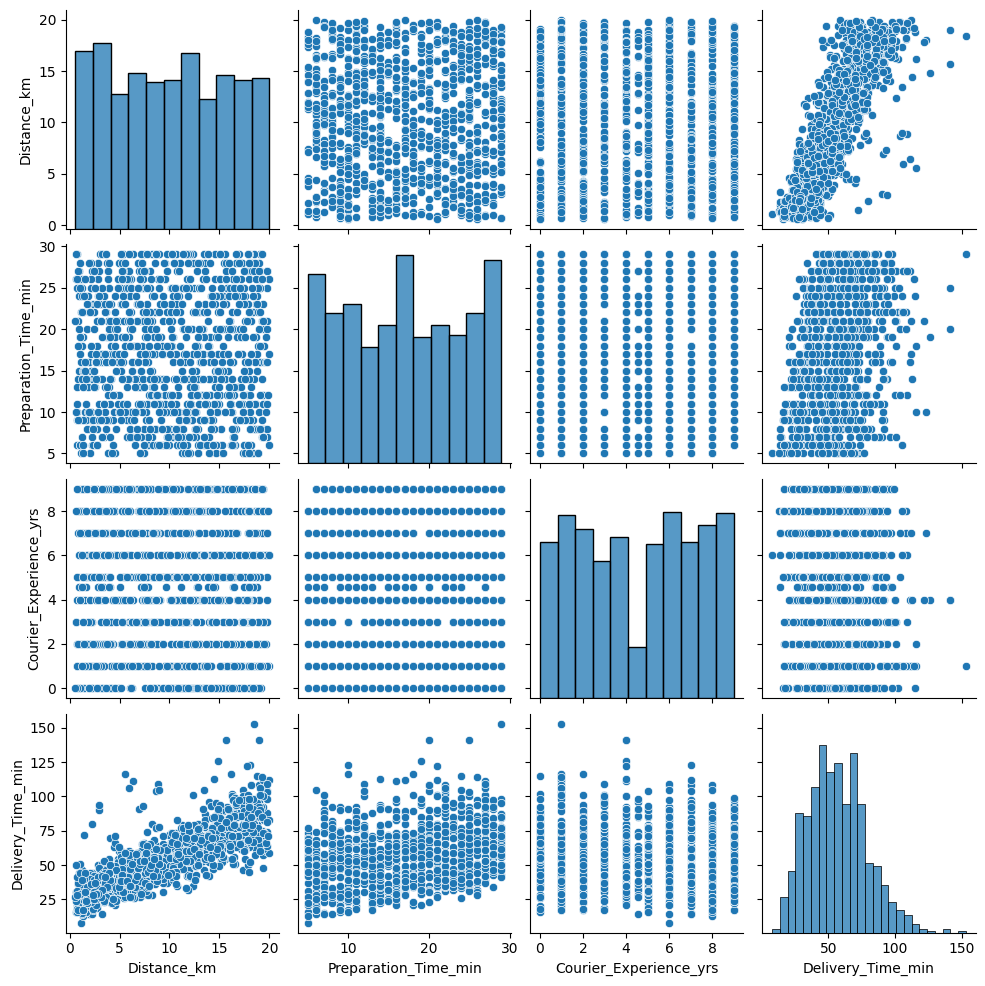

In [24]:
sns.pairplot(data=data,vars=num_cols,palette="viridis")
plt.show()

Bivariate Analysis

##### Preparation_Time_min vs Delivery_Time_min

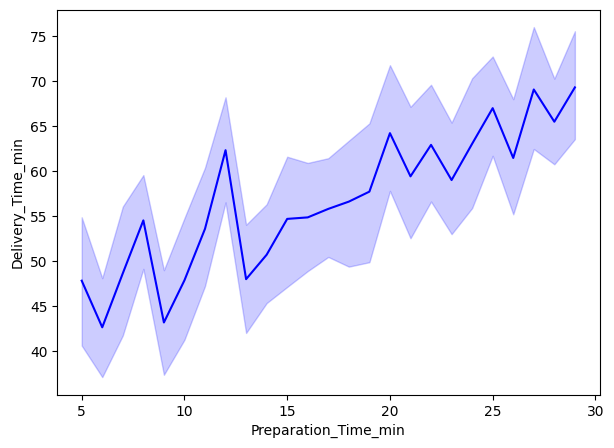

In [25]:
plt.figure(figsize=(7,5))
sns.lineplot(data=data,x="Preparation_Time_min",y="Delivery_Time_min",color="blue")
plt.show()


Courier_Experience_yrs Vs Delivery_Time_min

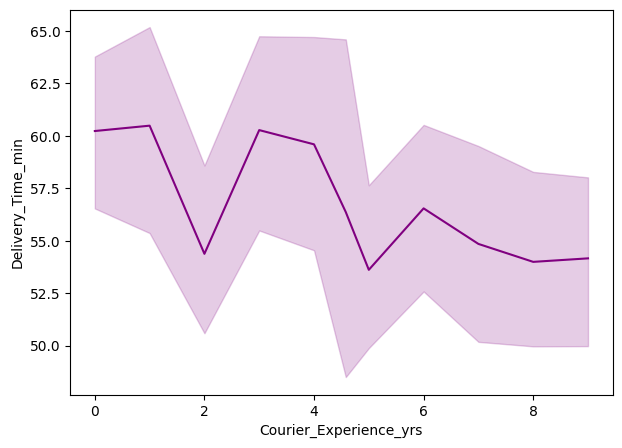

In [26]:
plt.figure(figsize=(7,5))
sns.lineplot(data=data,x="Courier_Experience_yrs",y="Delivery_Time_min",color="purple")
plt.show()

### Detecting  the Outliers

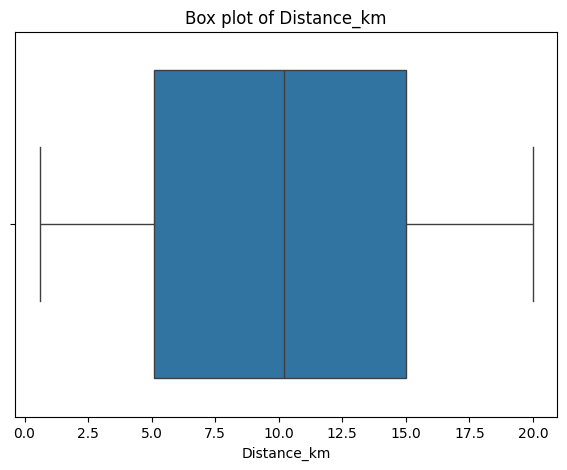

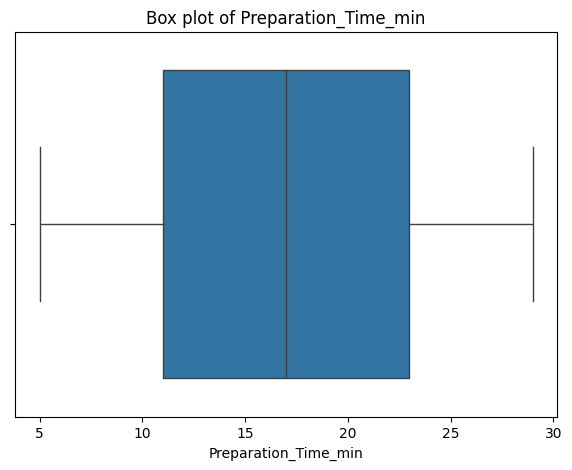

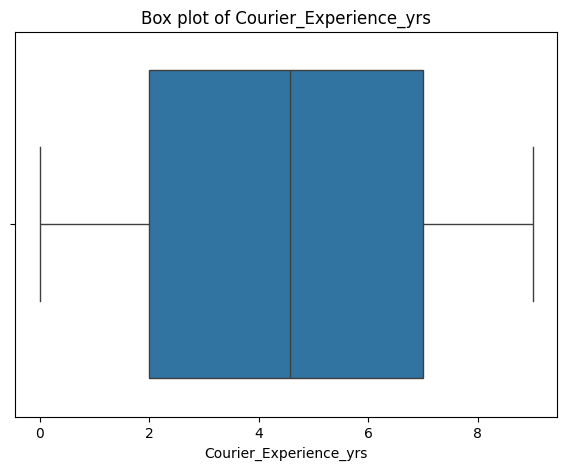

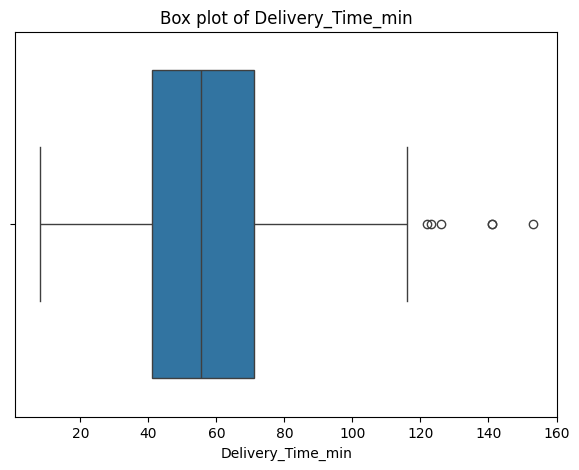

In [27]:
#outliers
for col in num_cols:
  plt.figure(figsize=(7,5))
  sns.boxplot(data=data,x=col)
  plt.title(f"Box plot of {col}")
  plt.show()

Observation:
* There are some outliers in the Delivery_Time_min

### Handling the outliers

In [28]:
def handel_outliers(data, columns):
  Q1=data[columns].quantile(0.25)
  Q3=data[columns].quantile(0.75)
  IQR=Q3-Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  data[columns] = data[columns].clip(lower=lower_bound, upper=upper_bound)


In [29]:
handel_outliers(data,"Delivery_Time_min")

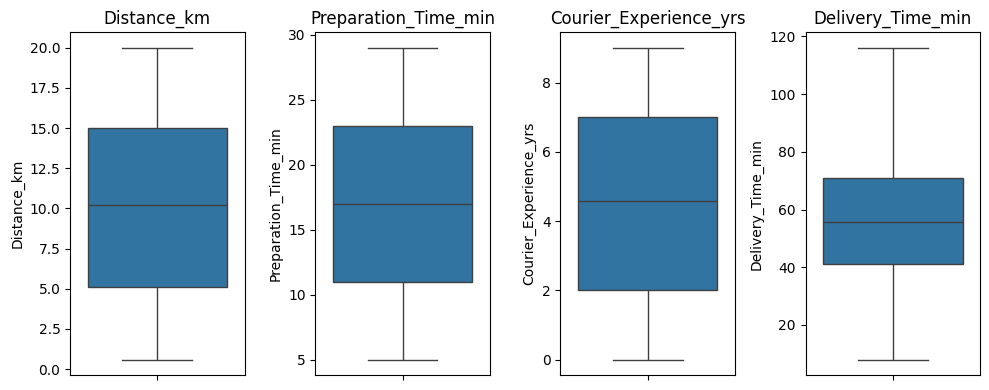

In [30]:
#chcek the box plot for  columns
plt.figure(figsize=(10, 4))

for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Observation: All Outliers are Cleared

In [31]:
data.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,19.03,Clear,Low,Morning,Bike,16,5.0,68


### Encoding

In [32]:
data=pd.get_dummies(data,columns=cat_cols,drop_first=True)

In [33]:
data.head()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,7.93,12,1.0,43,False,False,False,True,True,False,False,False,False,False,True
1,16.42,20,2.0,84,False,False,False,False,False,True,True,False,False,False,False
2,9.52,28,1.0,59,True,False,False,False,True,False,False,False,True,False,True
3,7.44,5,1.0,37,False,True,False,False,False,True,False,False,False,False,True
4,19.03,16,5.0,68,False,False,False,False,True,False,False,True,False,False,False


In [34]:
data.shape

(1000, 15)

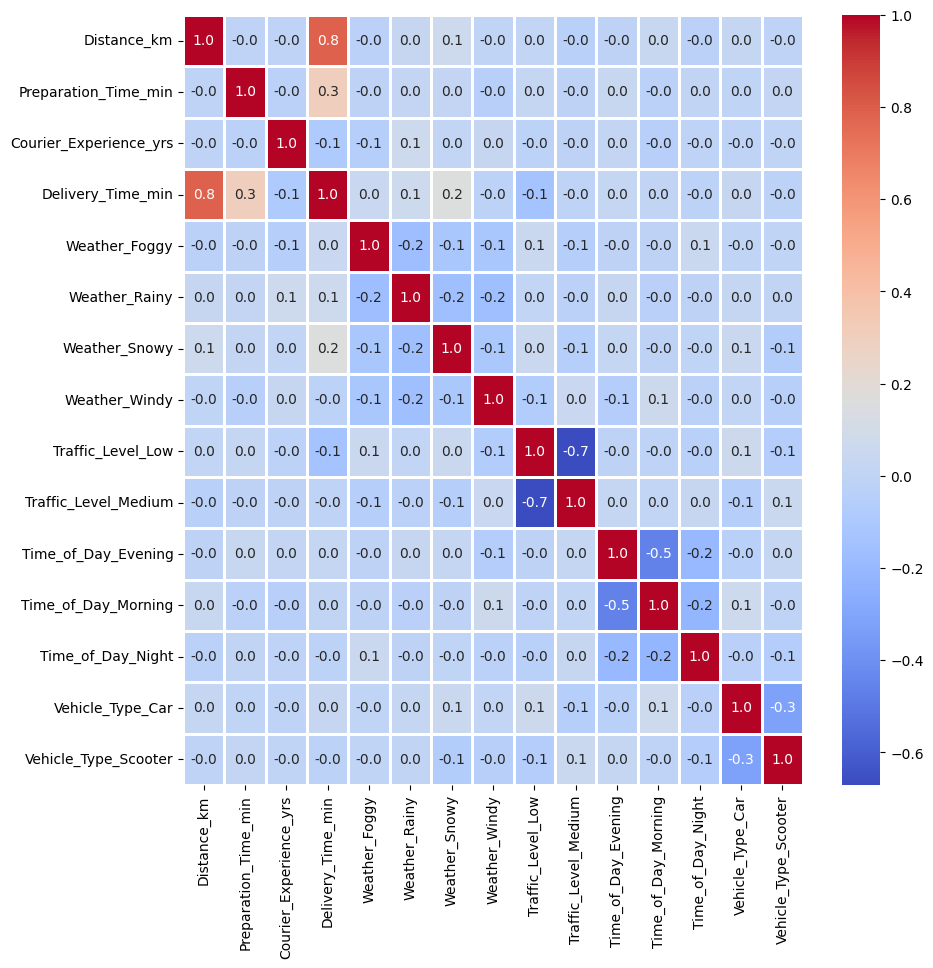

In [35]:
#Heat Map
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm",linewidths=1,fmt='.1f')
plt.show()

In [36]:
# threshold = 0.07

# correlation_matrix = df.corr()
# high_corr_features = correlation_matrix.index[abs(correlation_matrix["Delivery_Time_min"]) > threshold].tolist()
# high_corr_features.remove("Delivery_Time_min")
# print(high_corr_features)

### Making the depandant and indepandant variables

In [37]:
x=data.drop("Delivery_Time_min",axis=1)
y=data["Delivery_Time_min"]

### Splitting into the train and test

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 14)
(200, 14)
(800,)
(200,)


### Scaling

In [40]:
sc=StandardScaler()
#fit and transform  train data
x_train=sc.fit_transform(x_train)
#transform test data
x_test=sc.transform(x_test)

In [41]:
type(x_train)

numpy.ndarray

## Train the model

In [42]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=50,random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100,learning_rate=0.1,random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Lasso": Lasso(alpha=0.01),
    "Ridge": Ridge(alpha=1.0),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5)

}
best_model=None
best_score =float('inf')
best_model_name=""
results={}


for name, model in models.items():
    model.fit(x_train, y_train)
    #prediction
    preds = model.predict(x_test)
    #evaluation metrics
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)

    #store reslts
    results[name] = {"MAE":mae,"MSE":  mse,"RMSE": rmse,"R2Score": r2}
    # print(f"{name} - MAE: {mae:.4f}")
    # print(f"{name} - MSE: {mse:.4f}")
    # print(f"{name} - RMSE: {rmse:.4f}")
    # print(f"{name} - R2 Score: {r2:.4f}")
    # print("*"*50)

    #select the model with the lowest MAE
    if mae < best_score:
        best_score = mae
        best_model = model
        best_model_name = name

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='MAE', ascending=True)
print(results_df)
print(f"\nBest Model: {best_model_name} - MAE: {best_score:.4f}")


                         MAE         MSE       RMSE   R2Score
Linear Regression   5.850976   75.396095   8.683092  0.830347
Ridge               5.856013   75.438892   8.685557  0.830250
Lasso               5.857772   75.500507   8.689103  0.830112
ElasticNet          6.166973   78.666619   8.869420  0.822987
Random Forest       7.046400  103.224040  10.159923  0.767729
XGBoost             7.159070   99.149139   9.957366  0.776899
SVR                 9.205669  154.295110  12.421558  0.652811
KNN                11.102000  221.768800  14.891904  0.500985
Decision Tree      11.470000  261.270000  16.163849  0.412101

Best Model: Linear Regression - MAE: 5.8510


Observation:
* Linear Regression is the best model as it has the lower MAE 5.850976 ,RMSE 8.683092 ,higher R2 Score 0.830347

Save the best model

In [47]:
model_path ="linear_reg_model.pkl"
model=best_model
with open(model_path, "wb") as file:
  pickle.dump(model, file)
#save scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(sc, file)

Predict on the new data


In [44]:
data.columns

Index(['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min', 'Weather_Foggy', 'Weather_Rainy', 'Weather_Snowy',
       'Weather_Windy', 'Traffic_Level_Low', 'Traffic_Level_Medium',
       'Time_of_Day_Evening', 'Time_of_Day_Morning', 'Time_of_Day_Night',
       'Vehicle_Type_Car', 'Vehicle_Type_Scooter'],
      dtype='object')

In [48]:
import pickle

In [49]:
#Load model and scaler
with open('linear_reg_model.pkl', 'rb') as file:
    best_model = pickle.load(file)

with open('scaler.pkl', 'rb') as file:
    sc = pickle.load(file)

In [51]:
new_data = {
    'Distance_km': [5],
    'Preparation_Time_min': [12],
    'Courier_Experience_yrs': [4.0],
    'Weather_Foggy': [0],
    'Weather_Rainy': [1],
    'Weather_Snowy': [0],
    'Weather_Windy': [0],
    'Traffic_Level_Low': [1],
    'Traffic_Level_Medium': [0],
    'Time_of_Day_Evening': [0],
    'Time_of_Day_Morning': [0],
    'Time_of_Day_Night': [1],
    'Vehicle_Type_Car': [0],
    'Vehicle_Type_Scooter': [1]
}

#new data frame
new_df = pd.DataFrame(new_data)
# Scale the new data also
new_df_scaled = sc.transform(new_df)

# Prediction
lr_pred_new = best_model.predict(new_df_scaled)

print("Estimated Delivery time(in minutes):", lr_pred_new[0])


Estimated Delivery time(in minutes): 32.4787101939512
